<a href="https://colab.research.google.com/github/glorivaas/Machine_Learning25/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2 - Unsupervised Learning: Clustering


### Author: Gloria Rivas

## **Primary Question**

**How can we visualize the *decision boundary* for attributing a *new* (unlabeled) point to one of the GMM clusters?**  

####I will also use the mouse dataset for my examples.

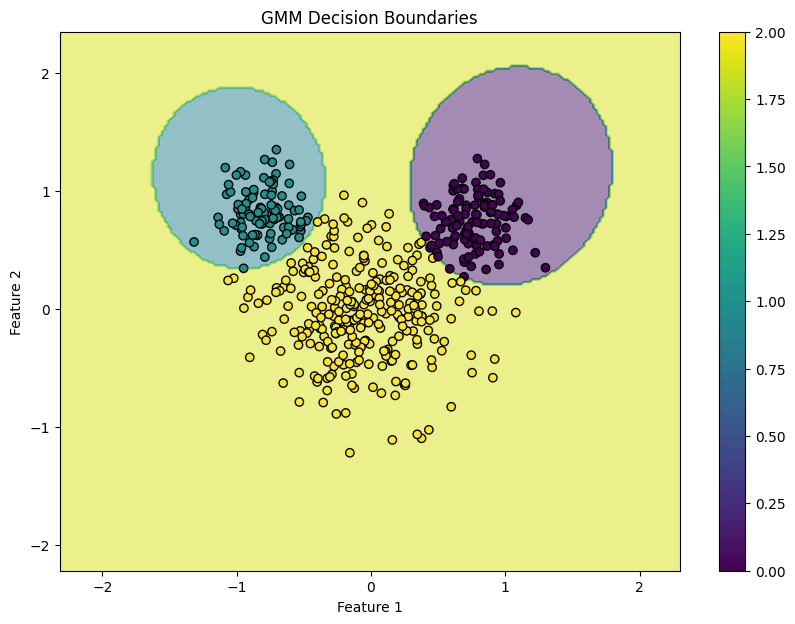

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

np.random.seed(0)
mean1 = np.array([0.0, 0.0])
cov1 = np.array([[0.16, 0.0],
                 [0.0,  0.16]])
data1 = np.random.multivariate_normal(mean1, cov1, 300)

mean2 = np.array([0.8, 0.8])
cov2 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data2 = np.random.multivariate_normal(mean2, cov2, 100)

mean3 = np.array([-0.8, 0.8])
cov3 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data3 = np.random.multivariate_normal(mean3, cov3, 100)

data_X = np.vstack([data1, data2, data3])
N, d = data_X.shape  # should be (500, 2)# Fit GMM model with 3 clusters
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(data_X)

x_min, x_max = data_X[:, 0].min() - 1, data_X[:, 0].max() + 1
y_min, y_max = data_X[:, 1].min() - 1, data_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

probs = gmm.predict_proba(grid)
labels = np.argmax(probs, axis=1)
labels = labels.reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, labels, alpha=0.5, cmap='viridis')
plt.scatter(data_X[:, 0], data_X[:, 1], c=gmm.predict(data_X), edgecolors='k', cmap='viridis')
plt.title('GMM Decision Boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

##**Explanation**
We created a grid of points covering the entire visible space, and then, for each point, we calculated the posterior probability of belonging to each cluster. The cluster with the highest probability for each point was selected.
The resulting plot shows the decision boundaries using a color map to represent which region belongs to which cluster. The points belonging to the same coloured region would be assigned to the same cluster.

The main irregularity we can notice is the dominance of the yellow (central) cluster.This is because the variance (covariance matrix) of the middle cluster is high, making it more spread out. As a solution to this we could regularize the covariance matrix. Unlike the middle cluster, the other two are smaller, with well-defined boundaries and elliptical, showing that GMM correctly captured their shape.

## **Secondary Question**

**If we *didn't know* the number of clusters in advance, how could we decide on a suitable $K$ for the clustering algorithm?**

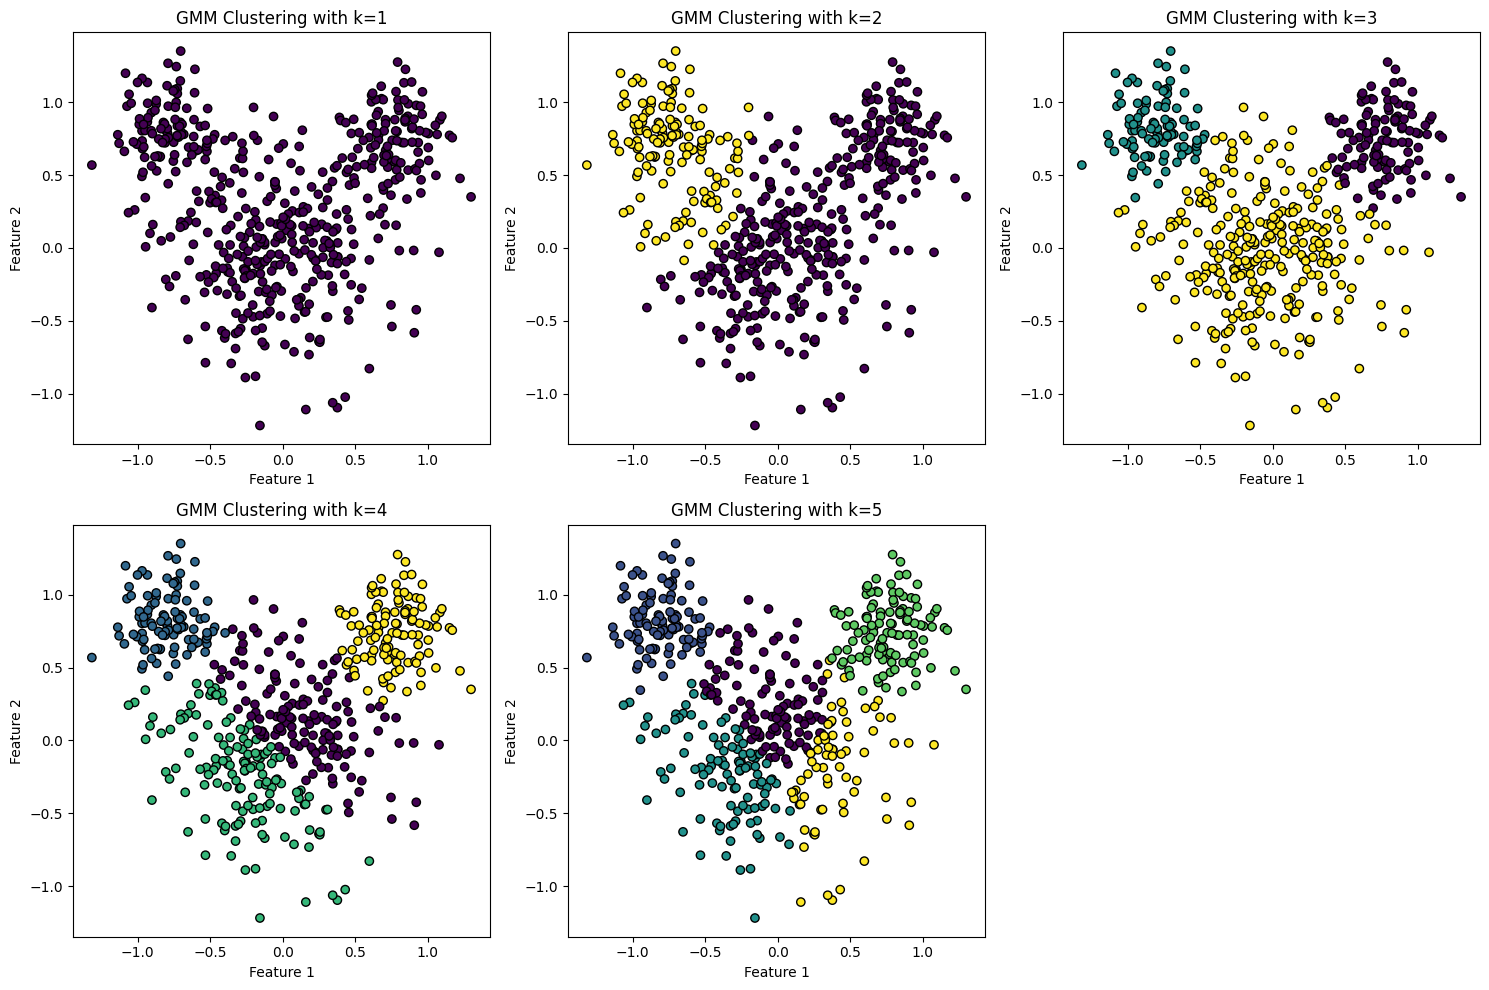

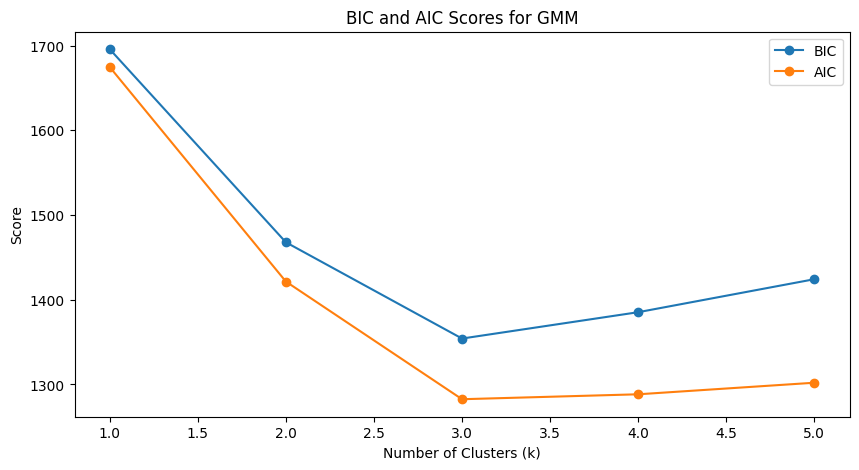

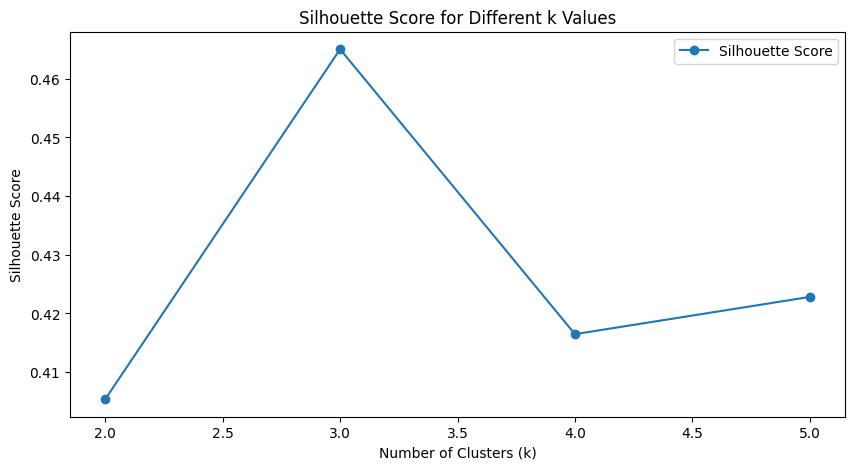

In [7]:
ks = range(1, 6)
plt.figure(figsize=(15, 10))

for i, k in enumerate(ks, 1):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(data_X)
    labels = gmm.predict(data_X)

    plt.subplot(2, 3, i)
    plt.scatter(data_X[:, 0], data_X[:, 1], c=labels, cmap='viridis', edgecolors='k')
    plt.title(f'GMM Clustering with k={k}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

bic_scores = []
aic_scores = []
silhouette_scores = []

for k in ks:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(data_X)
    labels = gmm.predict(data_X)
    bic_scores.append(gmm.bic(data_X))
    aic_scores.append(gmm.aic(data_X))
    silhouette_scores.append(silhouette_score(data_X, labels) if k > 1 else np.nan)

plt.figure(figsize=(10, 5))
plt.plot(ks, bic_scores, label='BIC', marker='o')
plt.plot(ks, aic_scores, label='AIC', marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.title('BIC and AIC Scores for GMM')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(ks[1:], silhouette_scores[1:], label='Silhouette Score', marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k Values')
plt.legend()
plt.show()


In order to answer this question, I decided to represent how the data would behave with different number of clusters. Then, I generated two plots that show the scores regarding the number of clusters. This values are measured in three measures.

Bayesian Information Criterion (BIC) evaluates how well the model fits the data while penalizing complexity. Moreover, lower BIC values indicate a better model (better fit with fewer parameters).

Akaike Information Criterion (AIC) is similar to BIC, therefore lower AIC values indicate a better model.

Silhouette Score, on the other hand, measures how well-separated clusters are. In this case, higher values (close to 1) indicate better-defined clusters.

In conclusion, the best K would be the one showing an elbow shape in the first plot and higher values for the silhouette score. Regarding this, K=3 seems like a reasonable choice in our example.

